<a href="https://colab.research.google.com/github/25thGilbertsProblem/NeuralNet-tests/blob/main/HWcifardataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Обучение сети на датасете CIFAR-10. Цель: достичь достаточно высокой точноcти, перебором различных сборок сети. Оценить точность полученного результата.**

/// Работу выполнил: Клевцов Александр

/// Используемый датасет: "CIFAR-10" https://www.cs.toronto.edu/~kriz/cifar.html

In [10]:
#Подгрузка бибилиотек/датасета и его разбиение:

import tensorflow
import pandas as pd
import matplotlib.pylab as plt
from keras.datasets import cifar10
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.preprocessing import OneHotEncoder

(x_train, y_train), (x_test, y_test)=cifar10.load_data()

print('Размер x_train: {}'.format(x_train.shape))
print('Размер x_test: {}'.format(x_test.shape)) 
print('Размер y_train: {}'.format(y_train.shape))
print('Размер y_test: {}'.format(y_test.shape))

Размер x_train: (50000, 32, 32, 3)
Размер x_test: (10000, 32, 32, 3)
Размер y_train: (50000, 1)
Размер y_test: (10000, 1)


In [3]:
#Нормировка датасета:
from keras.utils import to_categorical

x_train=x_train/255
x_test=x_test/255

y_train_cat=to_categorical(y_train,10)
y_test_cat=to_categorical(y_test,10)

In [4]:
#keras imports
from keras.models import Sequential, load_model
from keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout,Input, AveragePooling2D, Activation,Conv2D, MaxPooling2D, BatchNormalization,Concatenate
from keras.callbacks import EarlyStopping, TensorBoard
from keras import regularizers, optimizers
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

#Функция матрицы ошибок
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  print(cm)
  print()
  
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

Посмотрим на произвольных представителей датасета:

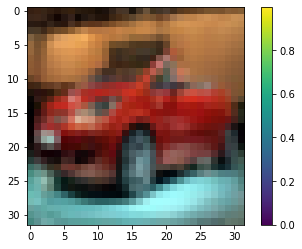

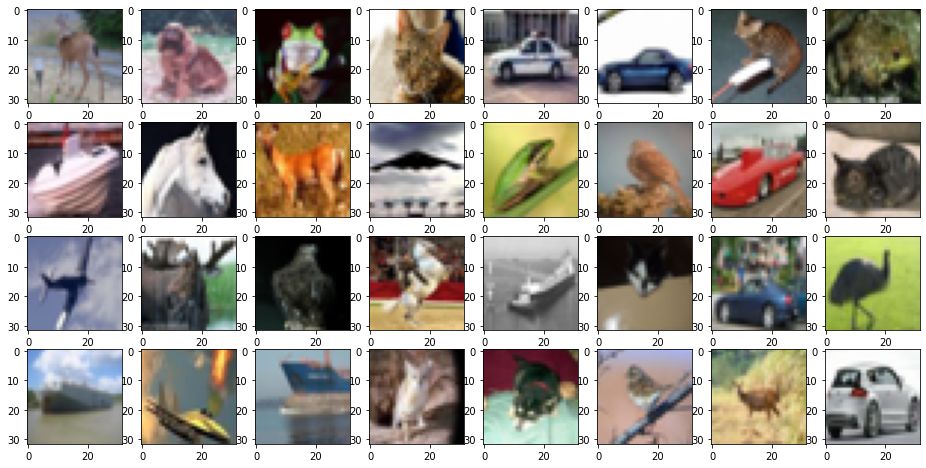

In [5]:
plt.figure()
plt.imshow(x_train[45])
plt.colorbar()
plt.grid(False)

plt.show()

fig, ax = plt.subplots(4, 8, figsize=(16,8))
k = 100 
for i in range(4):
    for j in range(8):
        ax[i][j].imshow(x_test[k], aspect='auto')
        k += 1
 
plt.show()

Соберем сначала простую двухслойную CNN, 32 фильтра на каждый слой, input_shape (32,32,3), activation='relu'.
Размеры изображений достаточно малы, поэтому будем использовать не очень большое кол-во слоев в СNN

In [26]:
#model1
model1=Sequential()

model1.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model1.add(MaxPool2D(pool_size=(2,2)))

model1.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model1.add(MaxPool2D(pool_size=(2,2)))

model1.add(Flatten())
model1.add(Dense(256,activation='relu'))
model1.add(Dense(10,activation='softmax'))
model1.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 800)               0         
                                                                 
 dense_2 (Dense)             (None, 256)              

In [29]:
history1=model1.fit(x_train,y_train_cat,epochs=10,validation_data=(x_test,y_test_cat))

Epoch 1/10
1563/1563 [==============================] - 106s 68ms/step - loss: 1.2938 - accuracy: 0.5384 - val_loss: 1.2809 - val_accuracy: 0.5506
Epoch 2/10
1563/1563 [==============================] - 97s 62ms/step - loss: 1.1038 - accuracy: 0.6106 - val_loss: 1.0896 - val_accuracy: 0.6104
Epoch 3/10
1563/1563 [==============================] - 75s 48ms/step - loss: 0.9771 - accuracy: 0.6577 - val_loss: 1.0509 - val_accuracy: 0.6365
Epoch 4/10
1563/1563 [==============================] - 79s 50ms/step - loss: 0.8847 - accuracy: 0.6910 - val_loss: 0.9854 - val_accuracy: 0.6593
Epoch 5/10
1563/1563 [==============================] - 75s 48ms/step - loss: 0.8089 - accuracy: 0.7181 - val_loss: 0.9579 - val_accuracy: 0.6762
Epoch 6/10
1563/1563 [==============================] - 74s 47ms/step - loss: 0.7376 - accuracy: 0.7421 - val_loss: 1.0052 - val_accuracy: 0.6649
Epoch 7/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.6844 - accuracy: 0.7590 - val_loss: 0.9635 

In [32]:
evaluation = model1.evaluate(x_test, y_test_cat)

print('Test Accuracy: {}'.format(evaluation[1]))
print('Test Loss: {}'.format(evaluation[0]))

# model1.save('CNN_CIFAR.h1')
# model1 = load_model('CNN_CIFAR.h1')

313/313 [==============================] - 5s 17ms/step - loss: 1.0798 - accuracy: 0.6735
Test Accuracy: 0.6735000014305115
Test Loss: 1.0797858238220215
313/313 [==============================] - 4s 14ms/step


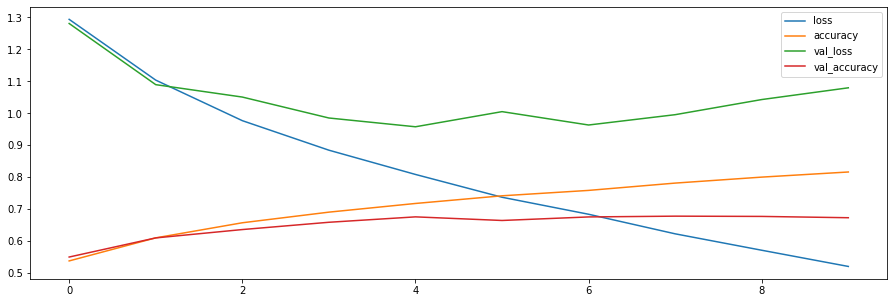

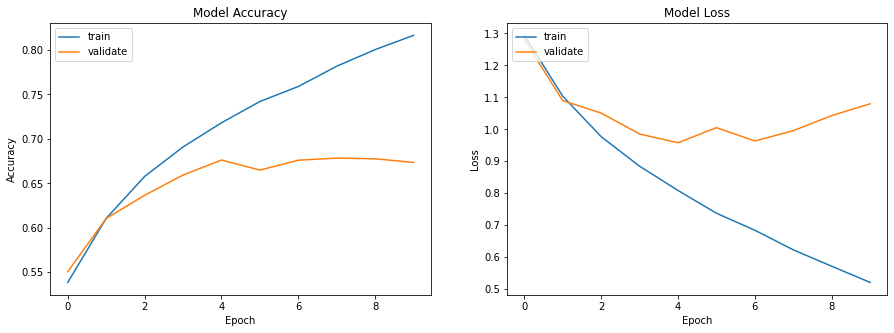

In [50]:
pd.DataFrame(history1.history).plot(figsize=(15.36,5))

fig, axs = plt.subplots(1,2,figsize=(15,5)) 
# История точности
axs[0].plot(history1.history['accuracy']) 
axs[0].plot(history1.history['val_accuracy']) 
axs[0].set_title('Model Accuracy')
axs[0].set_ylabel('Accuracy') 
axs[0].set_xlabel('Epoch')
axs[0].legend(['train', 'validate'], loc='upper left')
# История потерь
axs[1].plot(history1.history['loss']) 
axs[1].plot(history1.history['val_loss']) 
axs[1].set_title('Model Loss')
axs[1].set_ylabel('Loss') 
axs[1].set_xlabel('Epoch')
axs[1].legend(['train', 'validate'], loc='upper left')
plt.show();

Пока все очень плохо с результатами. Причем есть "беда" с valid loss, начиная уже с 2-3 эпохи - сильное отклонение. Будем исправлять:

In [52]:
#model2(model1 + Dropout)
#Добавил Dropout на оба слоя 

model2=Sequential()

model2.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model2.add(MaxPool2D(pool_size=(2,2)))
model2.add(Dropout(0.25))

model2.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model2.add(MaxPool2D(pool_size=(2,2)))
model2.add(Dropout(0.25))

model2.add(Flatten())
model2.add(Dense(256,activation='relu'))
model2.add(Dense(10,activation='softmax'))
model2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

history2=model2.fit(x_train,y_train_cat,epochs=10,validation_data=(x_test,y_test_cat))

Epoch 1/10
1563/1563 [==============================] - 88s 55ms/step - loss: 1.5670 - accuracy: 0.4296 - val_loss: 1.3519 - val_accuracy: 0.5202
Epoch 2/10
1563/1563 [==============================] - 85s 54ms/step - loss: 1.2703 - accuracy: 0.5474 - val_loss: 1.2029 - val_accuracy: 0.5680
Epoch 3/10
1563/1563 [==============================] - 78s 50ms/step - loss: 1.1394 - accuracy: 0.5964 - val_loss: 1.0791 - val_accuracy: 0.6175
Epoch 4/10
1563/1563 [==============================] - 79s 50ms/step - loss: 1.0504 - accuracy: 0.6291 - val_loss: 0.9818 - val_accuracy: 0.6540
Epoch 5/10
1563/1563 [==============================] - 82s 52ms/step - loss: 0.9848 - accuracy: 0.6528 - val_loss: 0.9983 - val_accuracy: 0.6536
Epoch 6/10
1563/1563 [==============================] - 82s 52ms/step - loss: 0.9221 - accuracy: 0.6754 - val_loss: 0.9297 - val_accuracy: 0.6764
Epoch 7/10
1563/1563 [==============================] - 79s 50ms/step - loss: 0.8750 - accuracy: 0.6935 - val_loss: 0.9261 -

313/313 [==============================] - 5s 14ms/step - loss: 0.9186 - accuracy: 0.6862
Test Accuracy: 0.6862000226974487
Test Loss: 0.9185974597930908
313/313 [==============================] - 5s 16ms/step


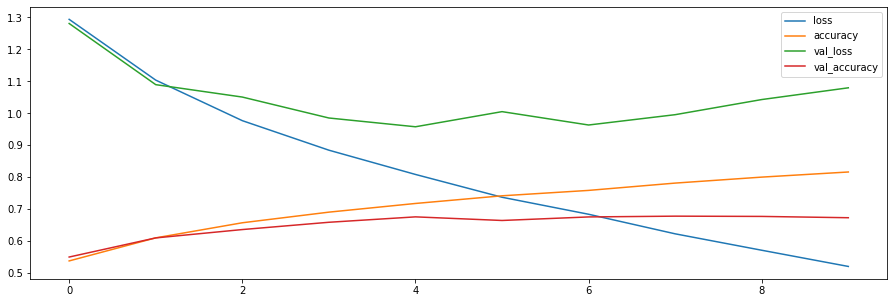

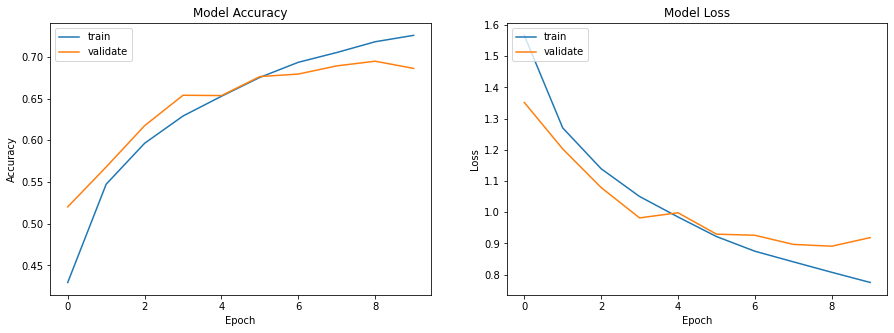

In [53]:
evaluation = model2.evaluate(x_test, y_test_cat)

print('Test Accuracy: {}'.format(evaluation[1]))
print('Test Loss: {}'.format(evaluation[0]))

predict2 = model2.predict(x_test)

pd.DataFrame(history1.history).plot(figsize=(15.36,5))

fig, axs = plt.subplots(1,2,figsize=(15,5)) 
# История точности
axs[0].plot(history2.history['accuracy']) 
axs[0].plot(history2.history['val_accuracy']) 
axs[0].set_title('Model Accuracy')
axs[0].set_ylabel('Accuracy') 
axs[0].set_xlabel('Epoch')
axs[0].legend(['train', 'validate'], loc='upper left')
# История потерь
axs[1].plot(history2.history['loss']) 
axs[1].plot(history2.history['val_loss']) 
axs[1].set_title('Model Loss')
axs[1].set_ylabel('Loss') 
axs[1].set_xlabel('Epoch')
axs[1].legend(['train', 'validate'], loc='upper left')
plt.show();

313/313 [==============================] - 6s 18ms/step
[[666  32  48   6  24   7  12  13 149  43]
 [ 18 851   1   2   5   5  10   6  36  66]
 [ 64  14 525  34 139  64  84  29  29  18]
 [ 15  26  65 376 125 170 114  45  34  30]
 [ 29   5  45  34 701  26  70  58  21  11]
 [ 18  14  42 123  85 571  57  63   9  18]
 [  7   7  36  27  47  10 837   5  11  13]
 [ 25   6  29  16  95  51  11 722   5  40]
 [ 48  35  14   6   5   5   6   3 848  30]
 [ 31 113   8   7   4   3  10   8  51 765]]



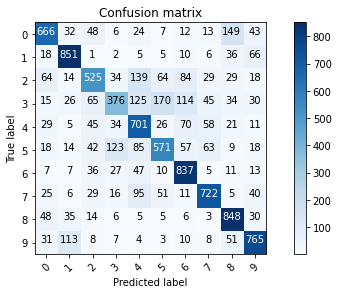

In [60]:
plt.rcParams['figure.figsize'] = [8,4]

p_test_2 = model2.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test_2)
plot_confusion_matrix(cm, list(range(10)))

Немного улучшим нашу сеть добавив чуть больше слоев и повысив кол-во фильтров

In [6]:
#model3
model3 = Sequential()

model3.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', input_shape = (32,32,3)))
model3.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
model3.add(MaxPool2D(2,2))
model3.add(Dropout(0.4))


model3.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
model3.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
model3.add(MaxPool2D(2,2))
model3.add(Dropout(0.4))

model3.add(Flatten())

model3.add(Dense(units = 1024, activation = 'relu'))

model3.add(Dense(units = 1024, activation = 'relu'))

model3.add(Dense(units = 10, activation = 'softmax'))
model3.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

history3=model3.fit(x_train,y_train_cat,epochs=10,validation_data=(x_test,y_test_cat)) 

Epoch 1/10
1563/1563 [==============================] - 535s 340ms/step - loss: 1.5407 - accuracy: 0.4345 - val_loss: 1.1846 - val_accuracy: 0.5699
Epoch 2/10
1563/1563 [==============================] - 509s 326ms/step - loss: 1.1437 - accuracy: 0.5933 - val_loss: 0.9662 - val_accuracy: 0.6616
Epoch 3/10
1563/1563 [==============================] - 506s 324ms/step - loss: 0.9786 - accuracy: 0.6549 - val_loss: 0.8783 - val_accuracy: 0.6961
Epoch 4/10
1563/1563 [==============================] - 507s 325ms/step - loss: 0.8698 - accuracy: 0.6923 - val_loss: 0.8209 - val_accuracy: 0.7163
Epoch 5/10
1563/1563 [==============================] - 513s 328ms/step - loss: 0.7937 - accuracy: 0.7198 - val_loss: 0.7744 - val_accuracy: 0.7328
Epoch 6/10
1563/1563 [==============================] - 512s 328ms/step - loss: 0.7348 - accuracy: 0.7393 - val_loss: 0.7945 - val_accuracy: 0.7300
Epoch 7/10
1563/1563 [==============================] - 502s 321ms/step - loss: 0.6892 - accuracy: 0.7557 - val_

313/313 [==============================] - 25s 81ms/step - loss: 0.7190 - accuracy: 0.7667
Test Accuracy: 0.766700029373169
Test Loss: 0.7190015316009521
313/313 [==============================] - 24s 76ms/step


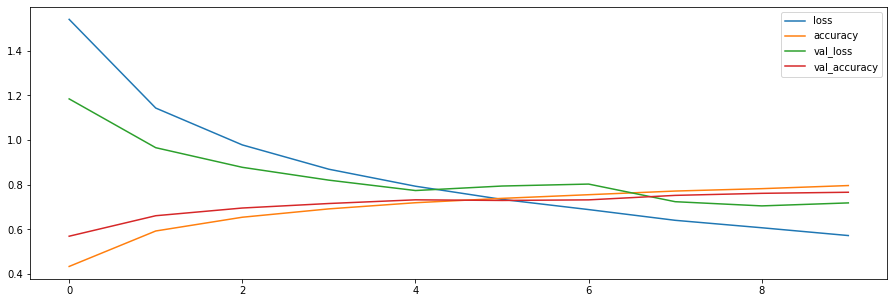

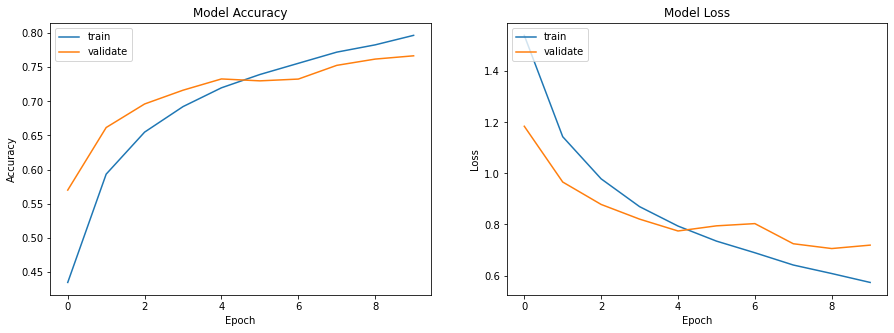

In [8]:
evaluation = model3.evaluate(x_test, y_test_cat)

print('Test Accuracy: {}'.format(evaluation[1]))
print('Test Loss: {}'.format(evaluation[0]))

predict3 = model3.predict(x_test)

pd.DataFrame(history3.history).plot(figsize=(15.36,5))

fig, axs = plt.subplots(1,2,figsize=(15,5)) 
# История точности
axs[0].plot(history3.history['accuracy']) 
axs[0].plot(history3.history['val_accuracy']) 
axs[0].set_title('Model Accuracy')
axs[0].set_ylabel('Accuracy') 
axs[0].set_xlabel('Epoch')
axs[0].legend(['train', 'validate'], loc='upper left')
# История потерь
axs[1].plot(history3.history['loss']) 
axs[1].plot(history3.history['val_loss']) 
axs[1].set_title('Model Loss')
axs[1].set_ylabel('Loss') 
axs[1].set_xlabel('Epoch')
axs[1].legend(['train', 'validate'], loc='upper left')
plt.show();

313/313 [==============================] - 25s 80ms/step
[[804  83  34   1   1   3   0  12  42  20]
 [ 11 920   1   1   1   1   0   4  11  50]
 [178  78 372  31  16 111  16 134  31  33]
 [122  89  28 178  12 301   6 147  49  68]
 [139  92  66  49 140 113  35 286  26  54]
 [ 54  52  21  41   3 614   2 161  18  34]
 [ 91 205  40  72  12  70 272 124  35  79]
 [ 52  37  15   6   9  57   0 768   6  50]
 [267 128   8   3   4   3   0   7 530  50]
 [ 43 190   0   1   0   5   0  18   7 736]]



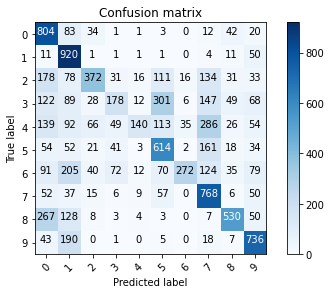

In [15]:
p_test_3 = model3.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test_3)
plot_confusion_matrix(cm, list(range(10)))

### Соберем теперь более "мощную" цепь, добавив дополнительных слоев (кол-во эпох обучения увеличил в 2 раза в сравнение с model3)

In [ ]:
#model4
model4 = Sequential()

model4.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model4.add(BatchNormalization())
model4.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model4.add(BatchNormalization())
model4.add(MaxPool2D((2, 2)))
model4.add(Dropout(0.2))

model4.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model4.add(BatchNormalization())
model4.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model4.add(BatchNormalization())
model4.add(MaxPool2D((2, 2)))
model4.add(Dropout(0.3))

model4.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model4.add(BatchNormalization())
model4.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model4.add(BatchNormalization())
model4.add(MaxPool2D((2, 2)))
model4.add(Dropout(0.4))

model4.add(Flatten())
model4.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model4.add(BatchNormalization())
model4.add(Dropout(0.5))
model4.add(Dense(10, activation='softmax'))
model4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history4=model4.fit(x_train,y_train_cat,epochs=20,validation_data=(x_test,y_test_cat))

Epoch 1/20
1563/1563 [==============================] - 483s 308ms/step - loss: 1.6235 - accuracy: 0.4347 - val_loss: 1.1475 - val_accuracy: 0.5896
Epoch 2/20
1563/1563 [==============================] - 465s 297ms/step - loss: 1.0923 - accuracy: 0.6180 - val_loss: 0.8757 - val_accuracy: 0.6934
Epoch 3/20
1563/1563 [==============================] - 485s 310ms/step - loss: 0.9058 - accuracy: 0.6854 - val_loss: 0.7827 - val_accuracy: 0.7278
Epoch 4/20
1563/1563 [==============================] - 457s 293ms/step - loss: 0.7933 - accuracy: 0.7260 - val_loss: 0.6470 - val_accuracy: 0.7738
Epoch 5/20
1563/1563 [==============================] - 441s 282ms/step - loss: 0.7217 - accuracy: 0.7526 - val_loss: 0.6391 - val_accuracy: 0.7773
Epoch 6/20
1563/1563 [==============================] - 446s 285ms/step - loss: 0.6629 - accuracy: 0.7746 - val_loss: 0.5872 - val_accuracy: 0.7995
Epoch 7/20
1563/1563 [==============================] - 444s 284ms/step - loss: 0.6164 - accuracy: 0.7891 - val_

In [ ]:
evaluation = model4.evaluate(x_test, y_test_cat)

print('Test Accuracy: {}'.format(evaluation[1]))
print('Test Loss: {}'.format(evaluation[0]))

predict4 = model4.predict(x_test)

pd.DataFrame(history4.history).plot(figsize=(15.36,5))

fig, axs = plt.subplots(1,2,figsize=(15,5)) 
# История точности
axs[0].plot(history4.history['accuracy']) 
axs[0].plot(history4.history['val_accuracy']) 
axs[0].set_title('Model Accuracy')
axs[0].set_ylabel('Accuracy') 
axs[0].set_xlabel('Epoch')
axs[0].legend(['train', 'validate'], loc='upper left')
# История потерь
axs[1].plot(history4.history['loss']) 
axs[1].plot(history4.history['val_loss']) 
axs[1].set_title('Model Loss')
axs[1].set_ylabel('Loss') 
axs[1].set_xlabel('Epoch')
axs[1].legend(['train', 'validate'], loc='upper left')
plt.show();

In [ ]:
plt.rcParams['figure.figsize'] = [12,8]
p_test_4 = model4.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test_4)
plot_confusion_matrix(cm, list(range(10)))

In [ ]:
#model5(model 4 + аугментация)
model5 = Sequential()

model5.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model5.add(BatchNormalization())
model5.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model5.add(BatchNormalization())
model5.add(MaxPool2D((2, 2)))
model5.add(Dropout(0.2))

model5.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model5.add(BatchNormalization())
model5.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model5.add(BatchNormalization())
model5.add(MaxPool2D((2, 2)))
model5.add(Dropout(0.3))

model5.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model5.add(BatchNormalization())
model5.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model5.add(BatchNormalization())
model5.add(MaxPool2D((2, 2)))
model5.add(Dropout(0.4))

model5.add(Flatten())
model5.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model5.add(BatchNormalization()),
model5.add(Dropout(0.5))
model5.add(Dense(10, activation='softmax'))

model5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Image Data Generator 
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True,rotation_range=20)
it_train = datagen.flow(x_train,y_train_cat)
steps = int(x_train.shape[0] / 64)
history5=model5.fit_generator(it_train,epochs=50,steps_per_epoch=steps,validation_data=(x_test,y_test_cat))

In [ ]:
evaluation = model5.evaluate(x_test, y_test_cat)

print('Test Accuracy: {}'.format(evaluation[1]))
print('Test Loss: {}'.format(evaluation[0]))

predict5 = model5.predict(x_test)

pd.DataFrame(history5.history).plot(figsize=(15.36,5))

fig, axs = plt.subplots(1,2,figsize=(15,5)) 
# История точности
axs[0].plot(history3.history['accuracy']) 
axs[0].plot(history3.history['val_accuracy']) 
axs[0].set_title('Model Accuracy')
axs[0].set_ylabel('Accuracy') 
axs[0].set_xlabel('Epoch')
axs[0].legend(['train', 'validate'], loc='upper left')
# История потерь
axs[1].plot(history3.history['loss']) 
axs[1].plot(history3.history['val_loss']) 
axs[1].set_title('Model Loss')
axs[1].set_ylabel('Loss') 
axs[1].set_xlabel('Epoch')
axs[1].legend(['train', 'validate'], loc='upper left')
plt.show();

In [ ]:
plt.rcParams['figure.figsize'] = [12,8]
p_test_5 = model5.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test_4)
plot_confusion_matrix(cm, list(range(10)))

In [ ]:
row = 5
column = 5
fig, axes = plt.subplots(row, column, figsize=(12,12))
axes = axes.ravel()

right_idx = np.where(Y_pred_classes == Y_true)[0]
for i in np.arange(0, row*column):
  axes[i].imshow(x_test[right_idx[i]].squeeze(), cmap = plt.cm.binary)
  axes[i].set_title("true: %s \n predicted: %s" % (labels[Y_true[right_idx[i]]], labels[Y_pred_classes[right_idx[i]]]))
  axes[i].axis('off')
  plt.subplots_adjust(wspace=1)

In [ ]:
R = 3
C = 5
fig, axes = plt.subplots(R, C, figsize=(12,8))
axes = axes.ravel()

misclassified_idx = np.where(Y_pred_classes != Y_true)[0]
for i in np.arange(0, R*C):
    axes[i].imshow(x_test[misclassified_idx[i]])
    axes[i].set_title("True: %s \nPredicted: %s" % (labels[Y_true[misclassified_idx[i]]], 
                                                  labels[Y_pred_classes[misclassified_idx[i]]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

In [ ]:
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'trained_model2.h5'

# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model5.save(model_path)
print('Saved trained model at %s ' % model_path)